In [1]:
import glob
import numpy as np
import pandas as pd
import re
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [195]:


csv_data ='/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/all_lvls_4train.csv'
all_lvls_df = pd.read_csv(csv_data, index_col=0)

all_lvls_df.head()

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,z_weights,t_weights,target.tire.goal_0,frogs,bugs,winkies,target.munchkins.goal_0,target.tire.goal _0,x_weights,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,l_weights,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate
level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,25,25,25,25,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.15
2,24,30,23,23,10,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18
3,20,20,20,40,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67
4,18,18,30,17,10,0,17,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32
5,18,18,18,28,10,21,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84


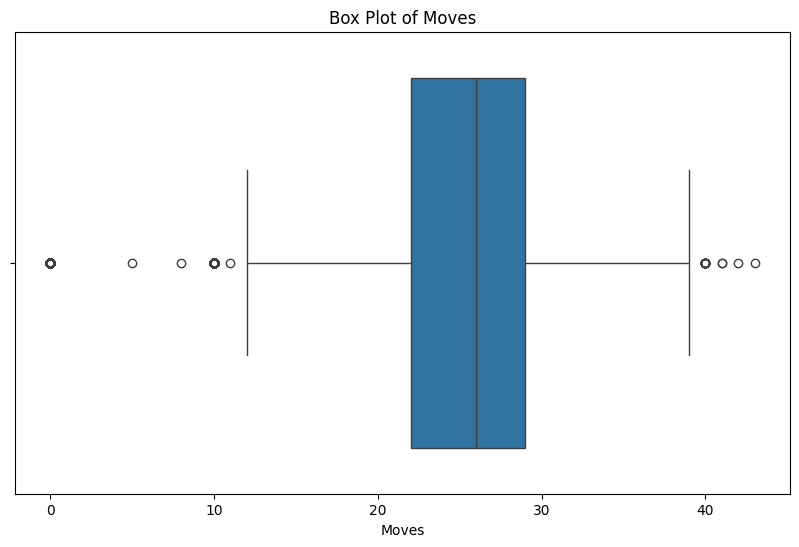

In [196]:
# prompt: box plot for all_lvls_df['moves']

plt.figure(figsize=(10, 6))
sns.boxplot(x=all_lvls_df['moves'])
plt.title('Box Plot of Moves')
plt.xlabel('Moves')
plt.show()

In [197]:
all_lvls_df['moves'].unique()


array([10, 20,  5, 23,  8, 19, 21, 25, 17, 24, 22, 30, 14, 39, 26, 29, 27,
       16, 15, 18, 28, 31,  0, 35, 34, 38, 33, 40, 32, 36, 37, 13, 12, 11,
       42, 41, 43])

In [198]:
# all_lvls_df.loc[all_lvls_df['key'] != 'row', 'value'] = df.loc[df['key'] != 'row', 'value'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [199]:
all_lvls_df['moves'] = all_lvls_df['moves'].map(lambda x: 10 if x <= 10 else x)
all_lvls_df['moves'] = all_lvls_df['moves'].map(lambda x: 40 if x >= 40 else x)

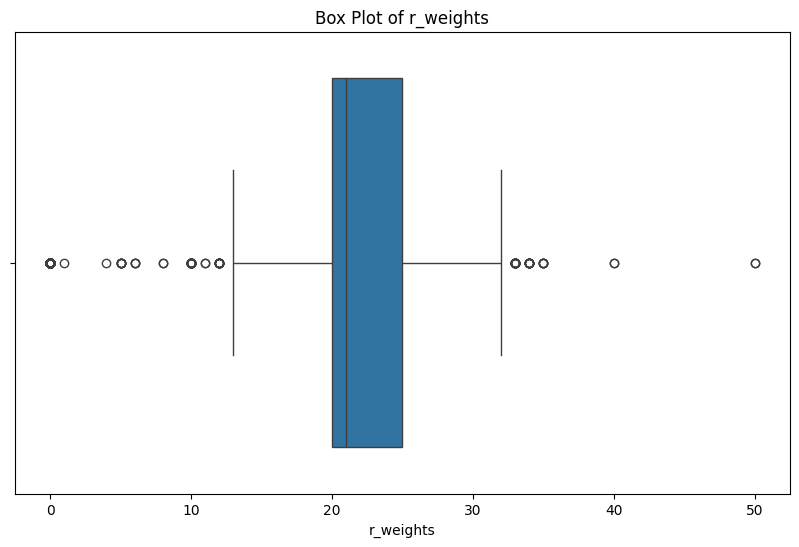

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_lvls_df['r_weights'])
plt.title('Box Plot of r_weights')
plt.xlabel('r_weights')
plt.show()

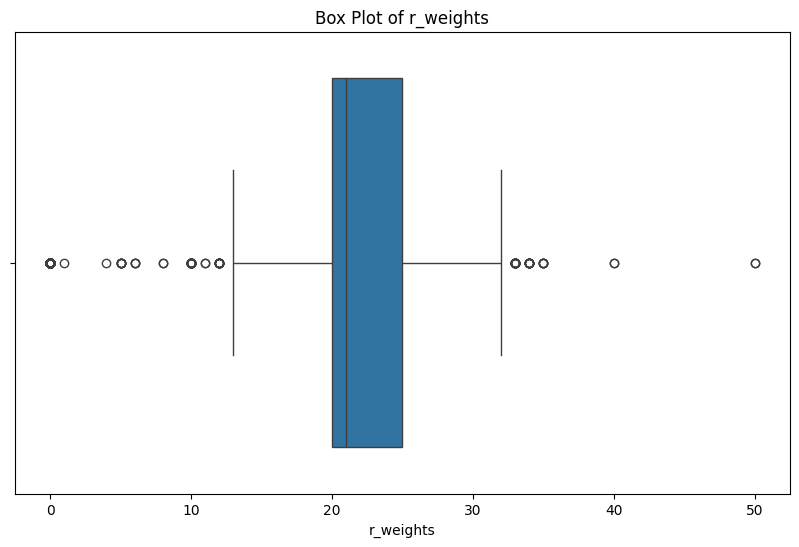

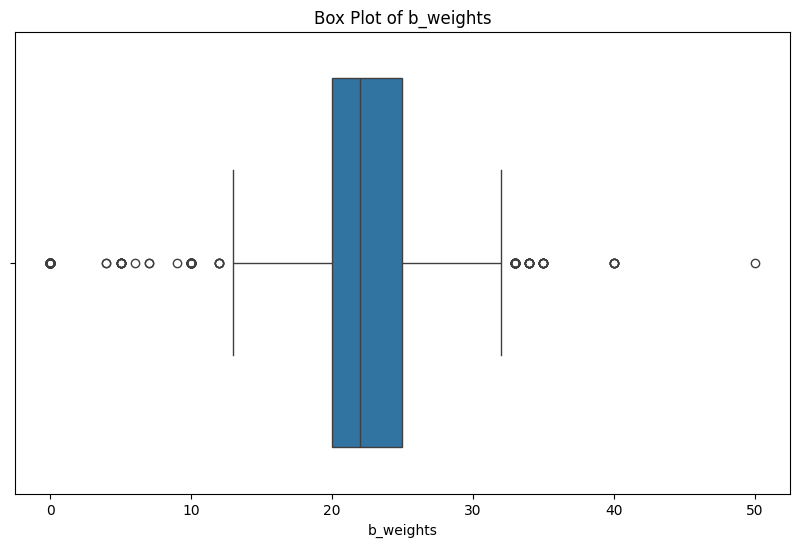

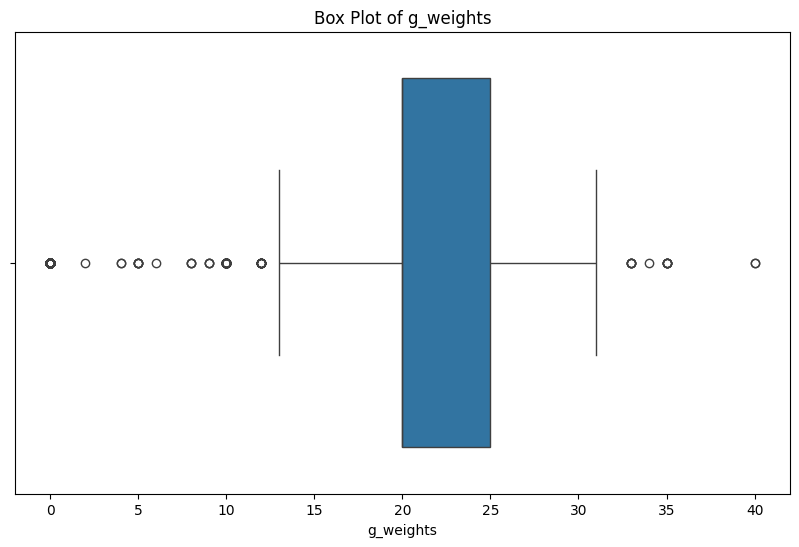

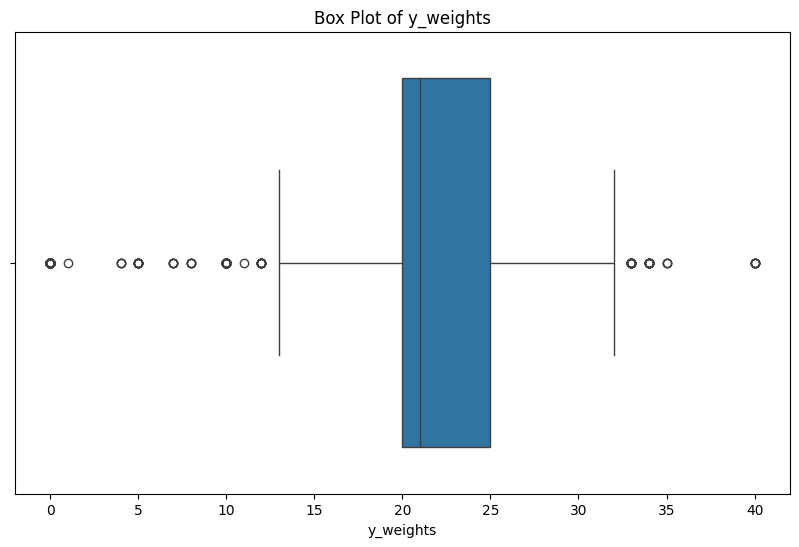

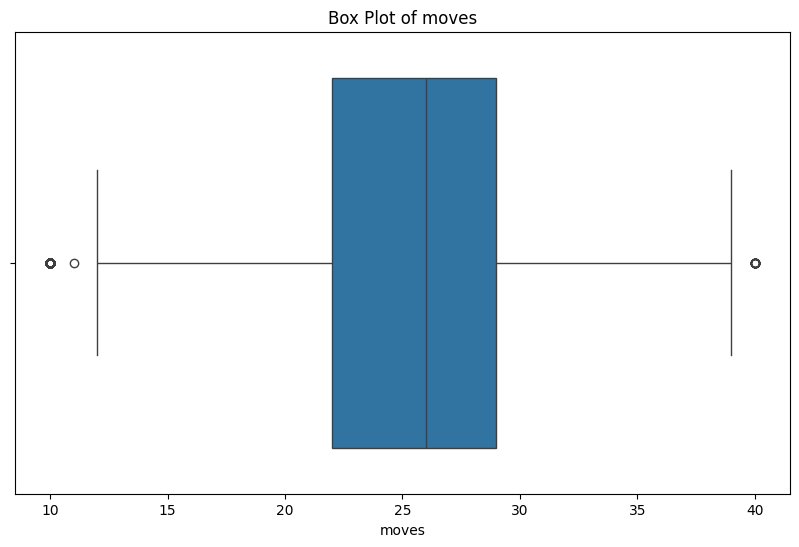

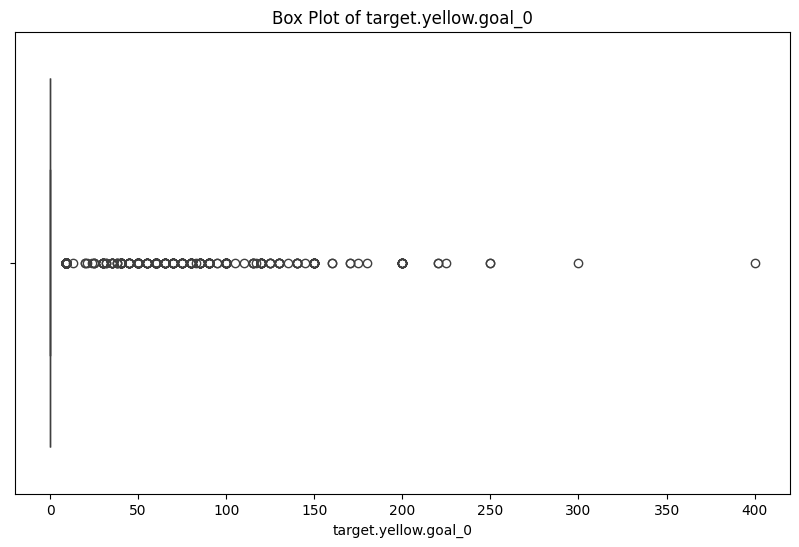

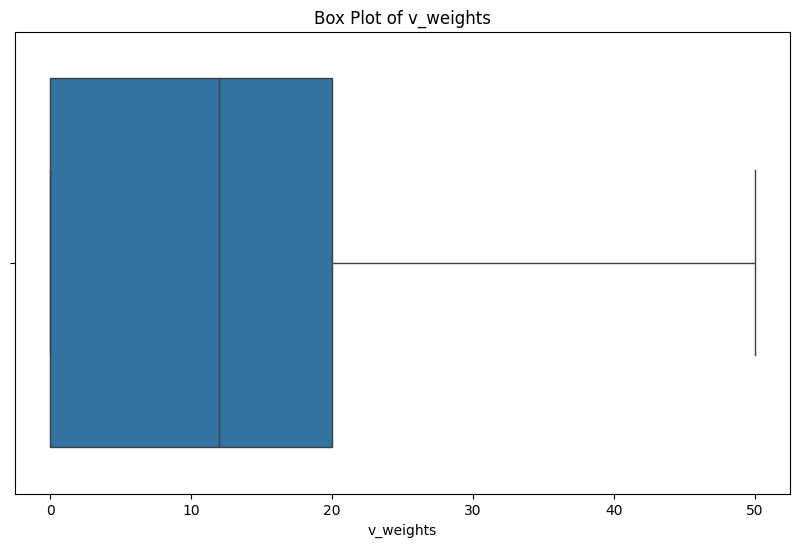

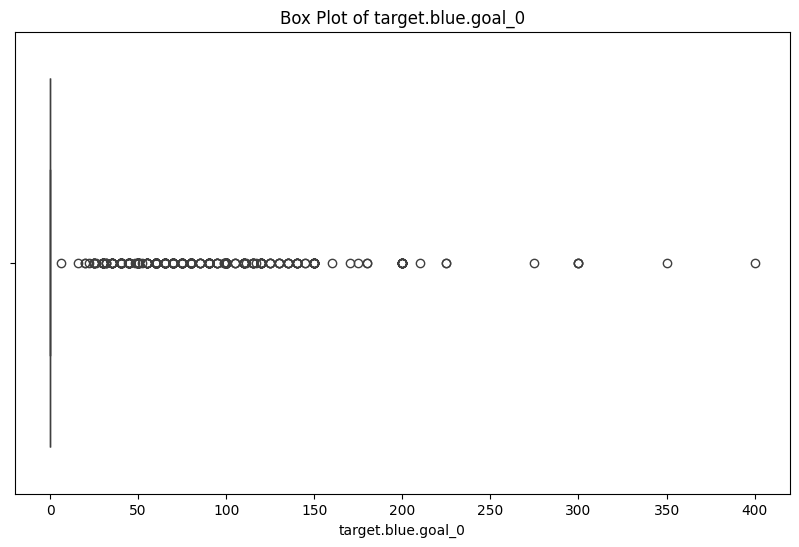

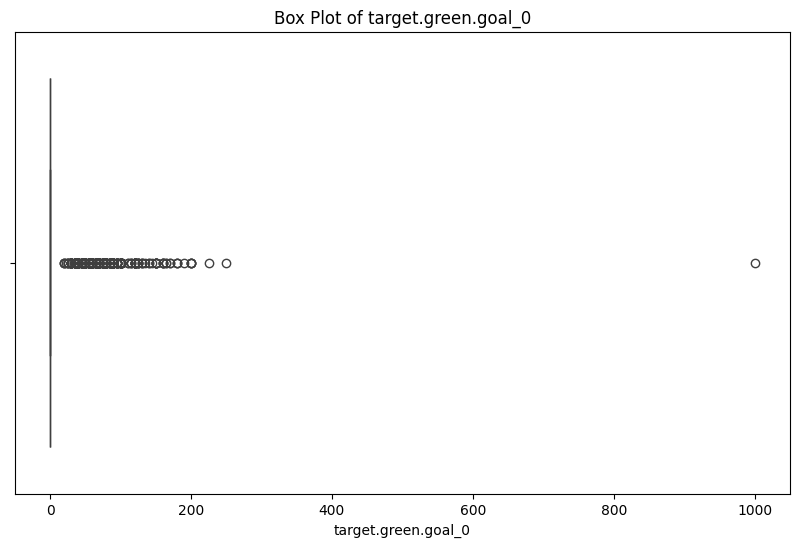

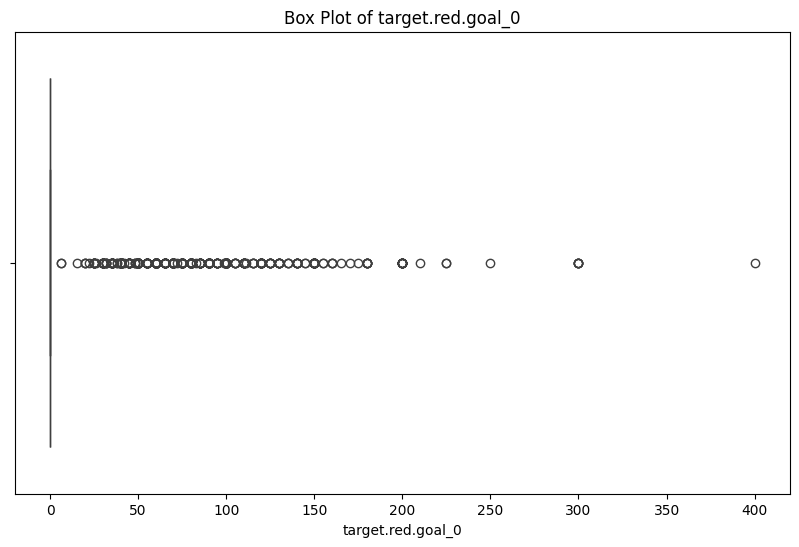

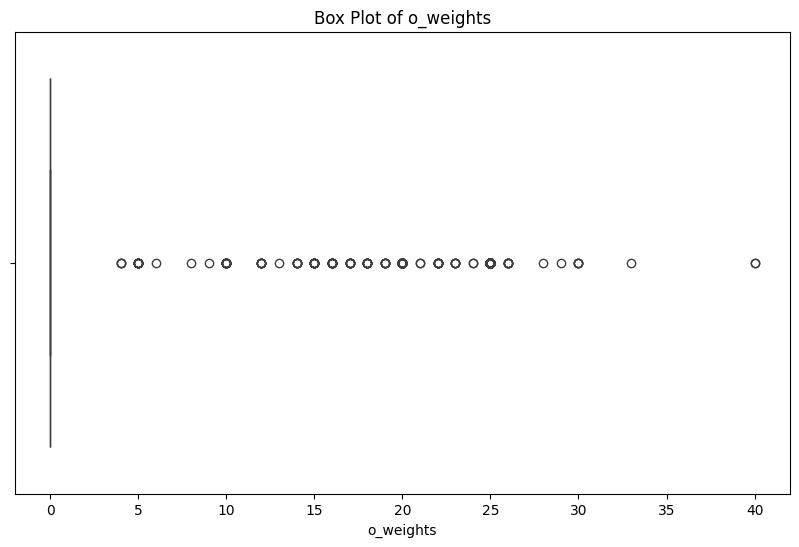

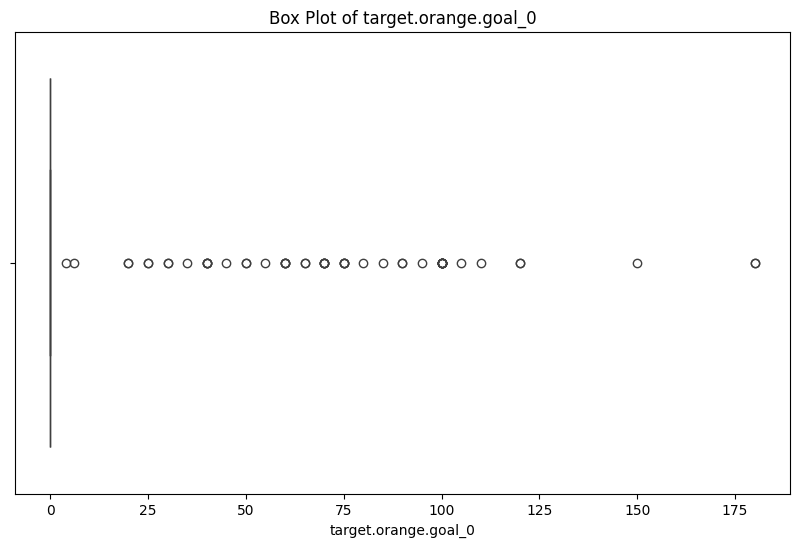

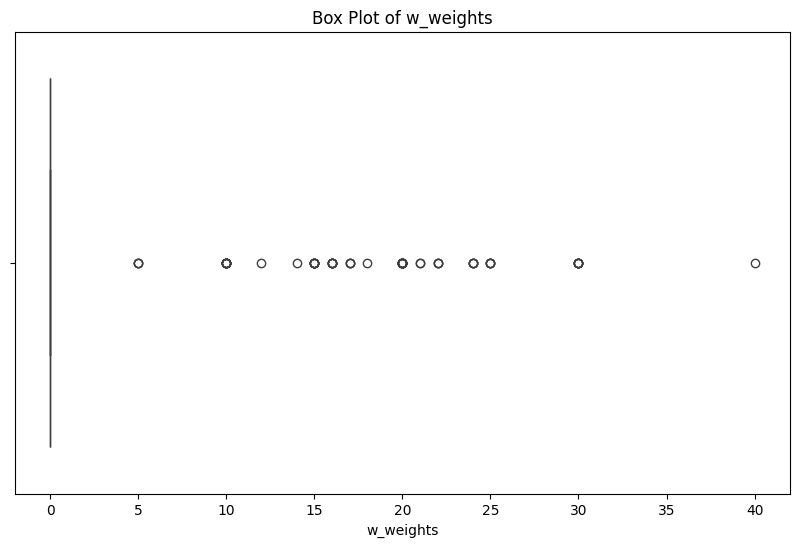

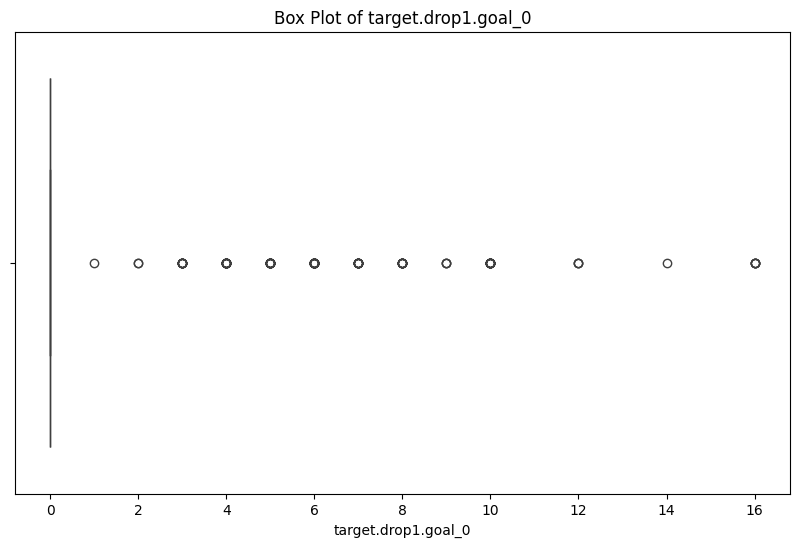

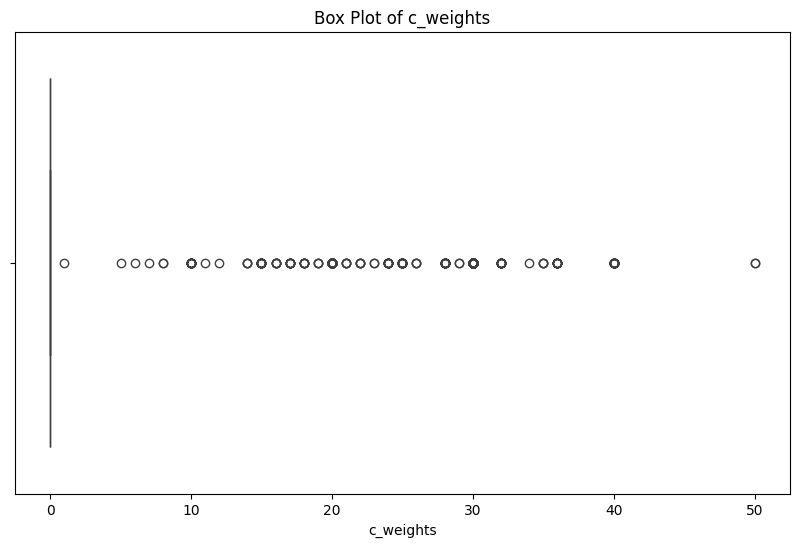

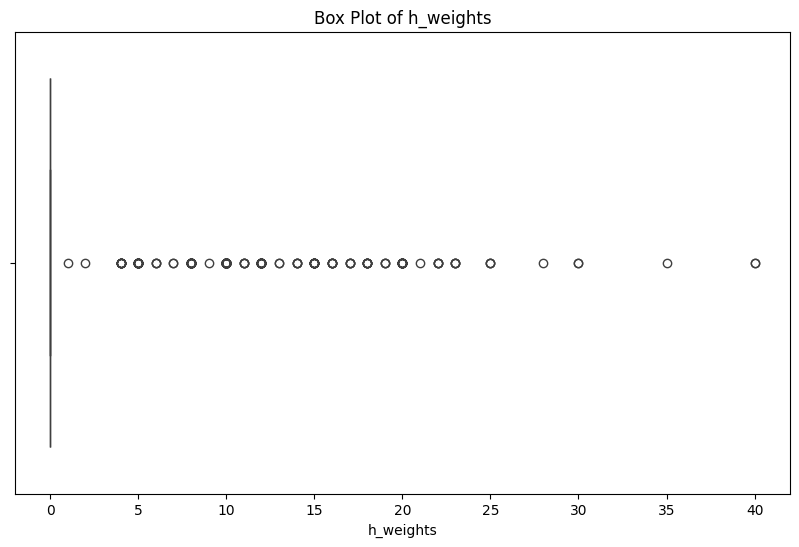

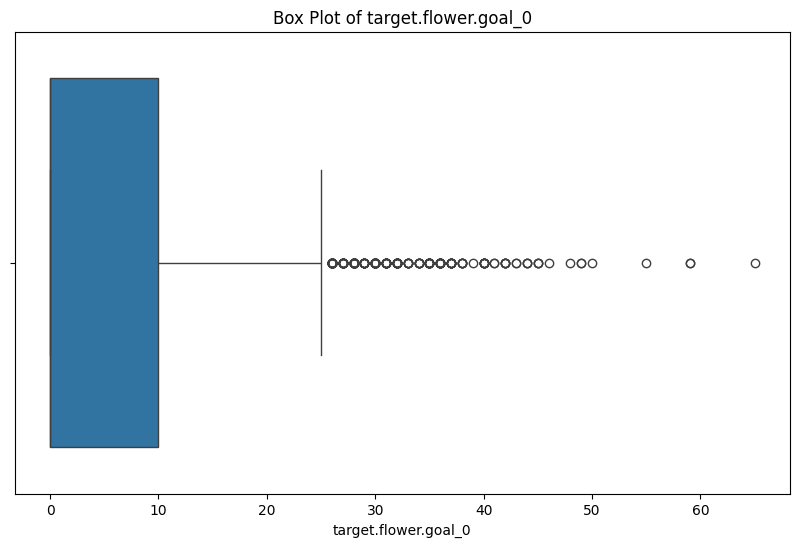

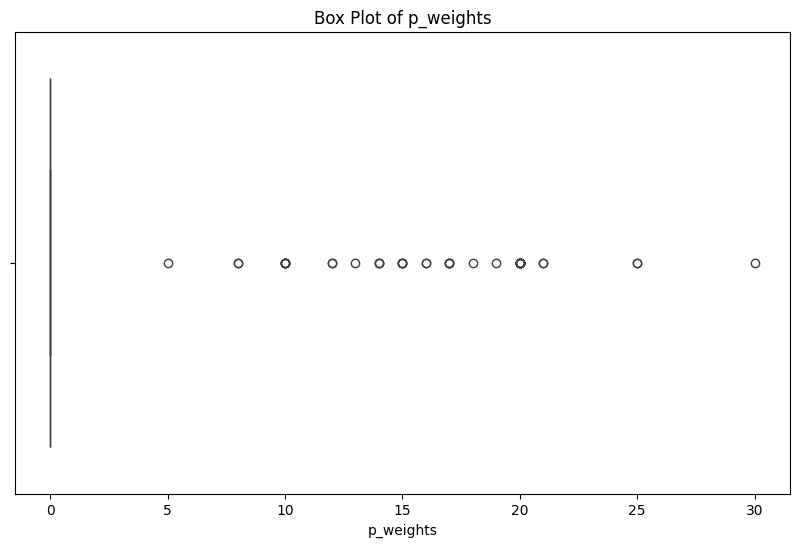

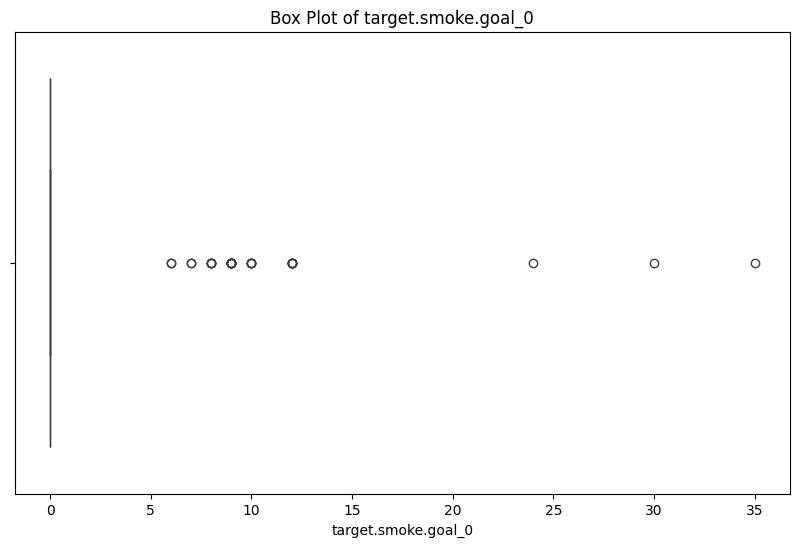

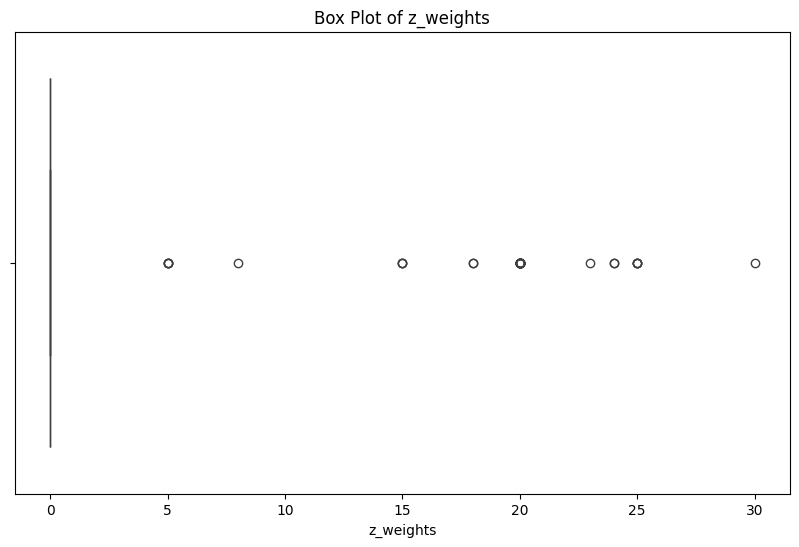

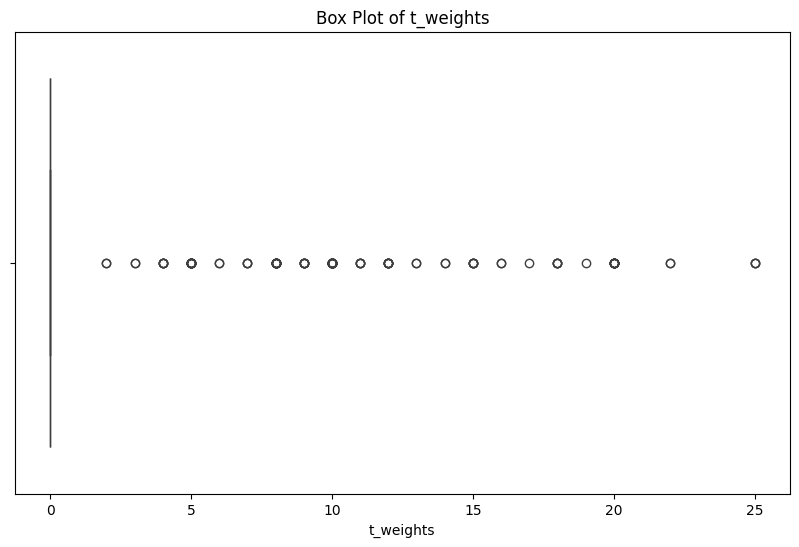

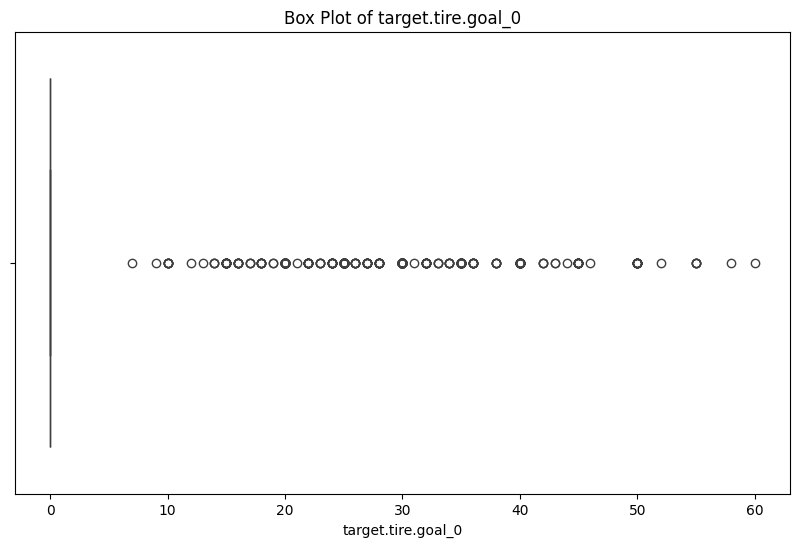

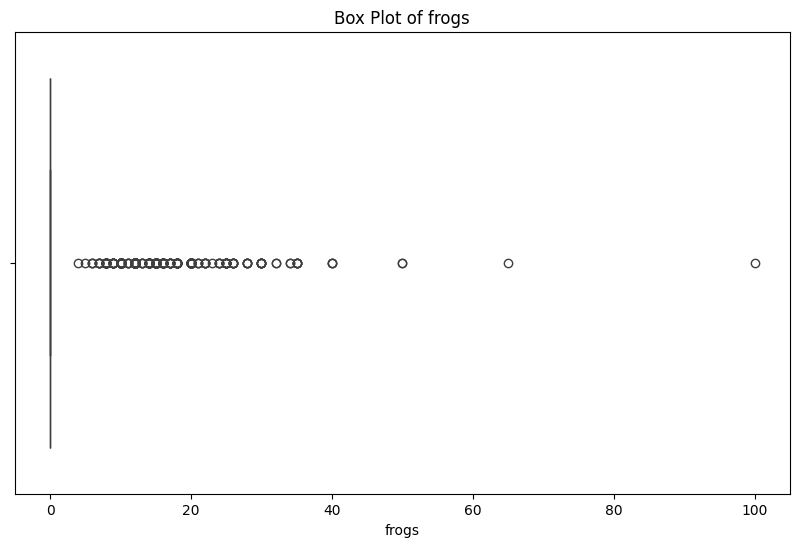

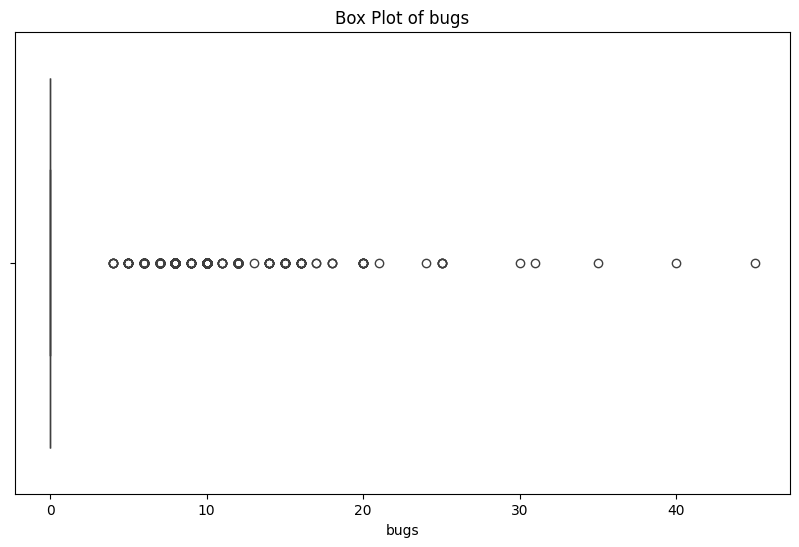

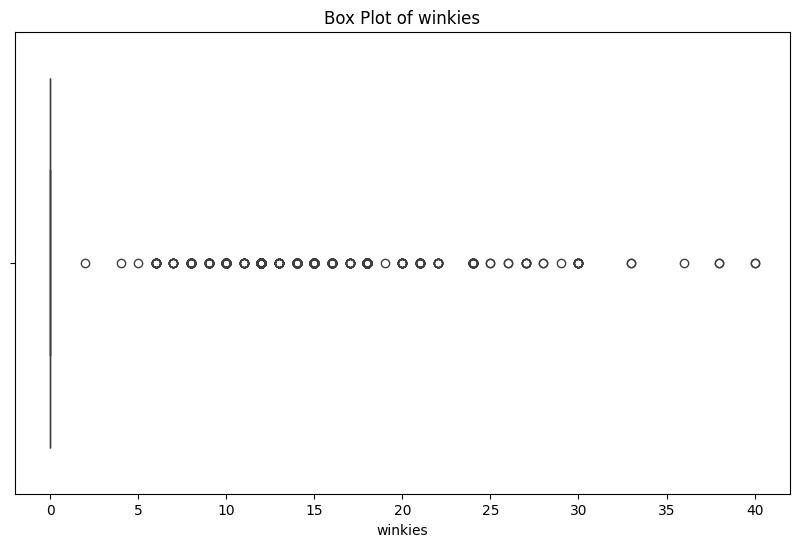

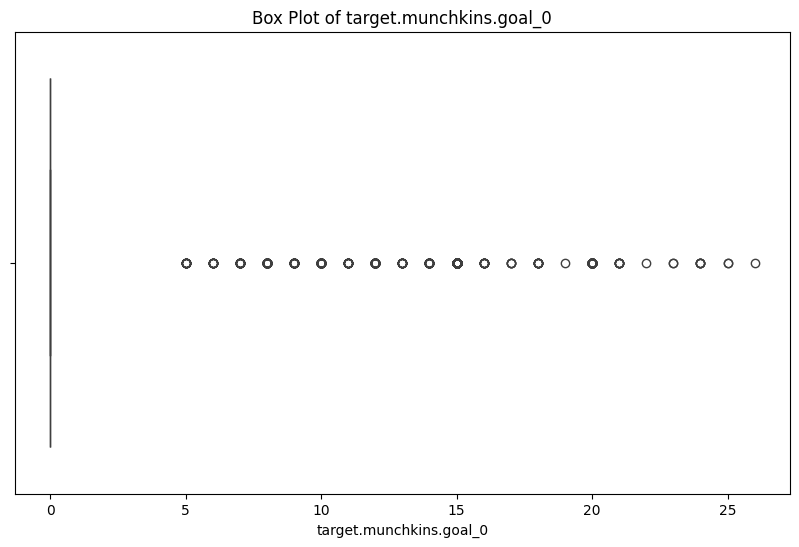

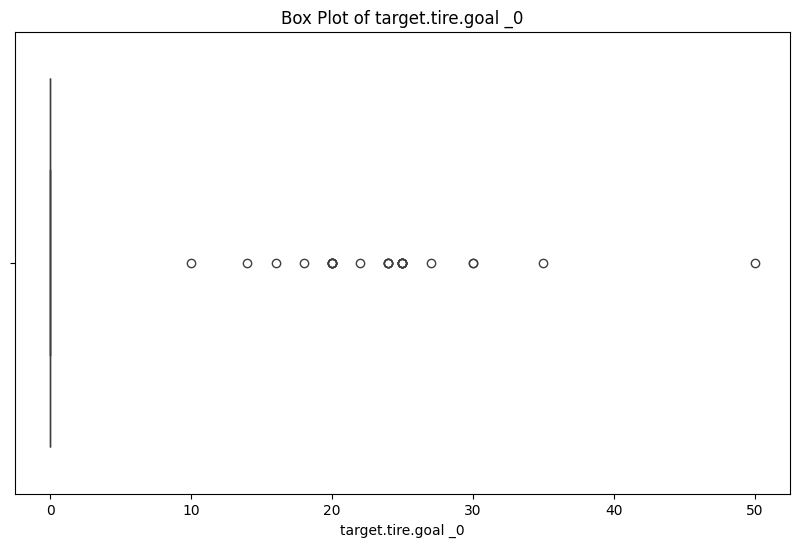

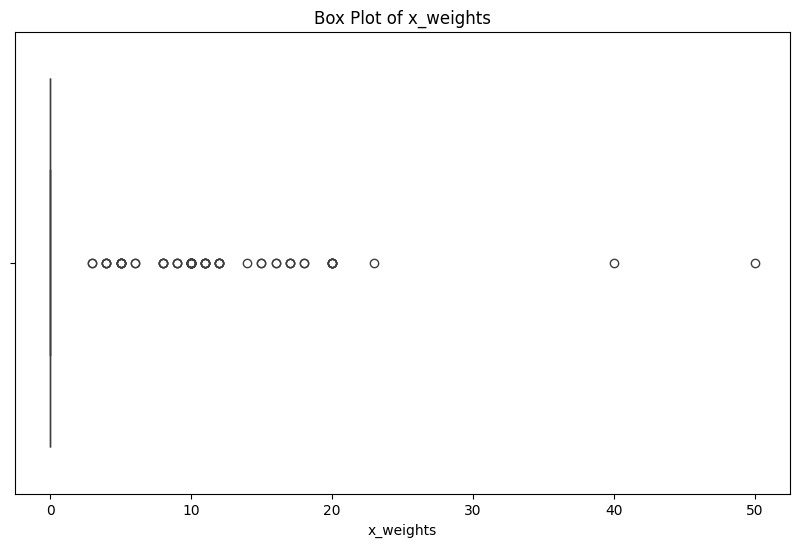

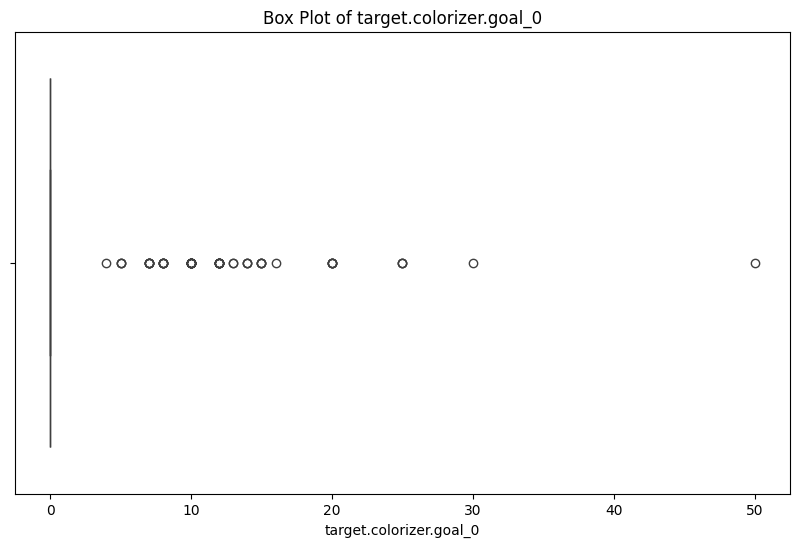

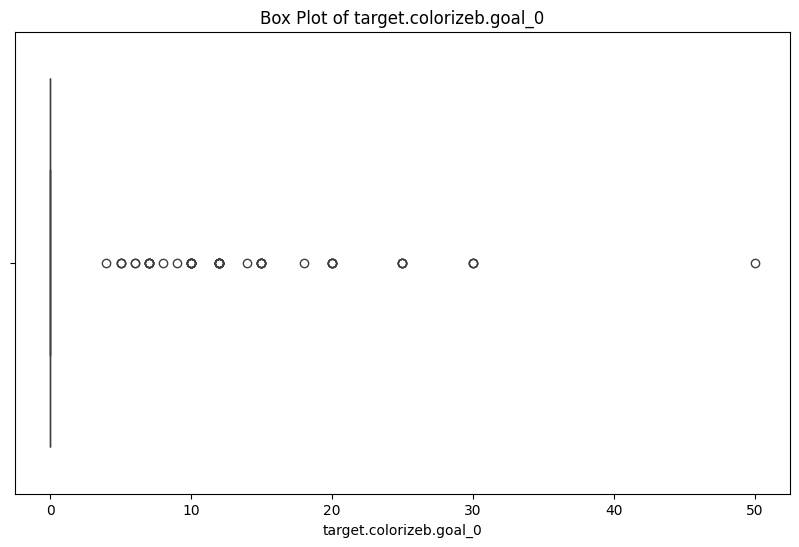

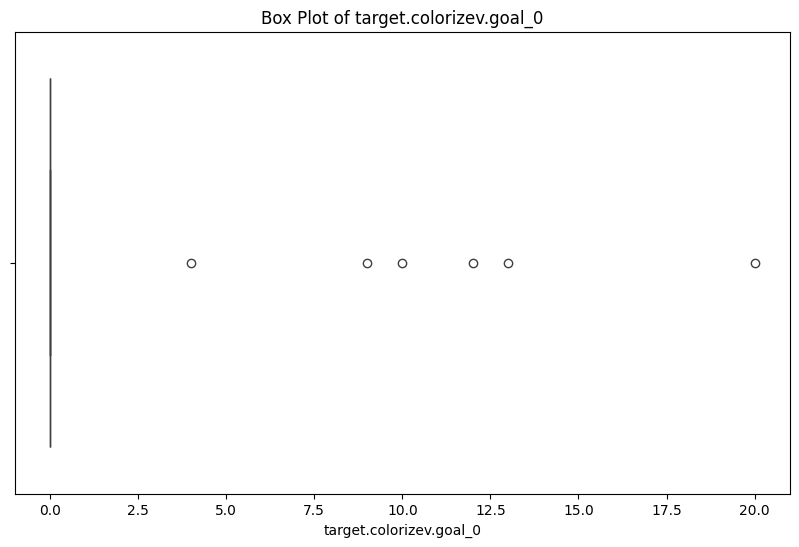

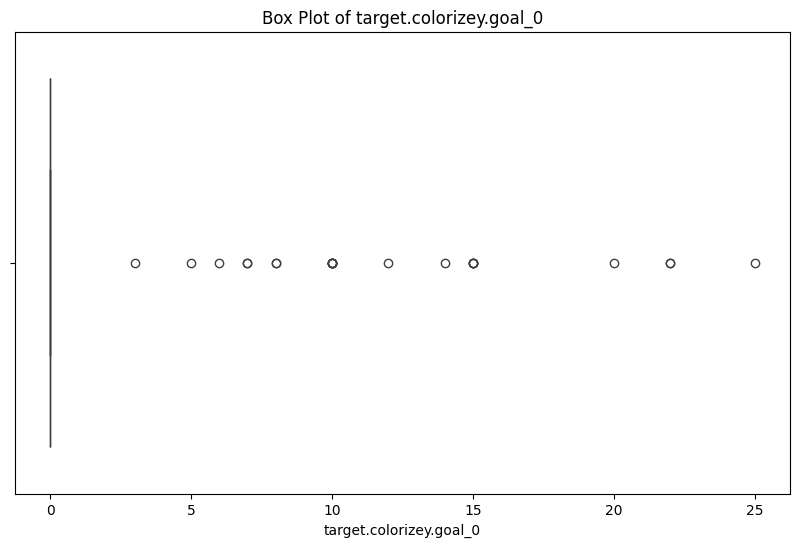

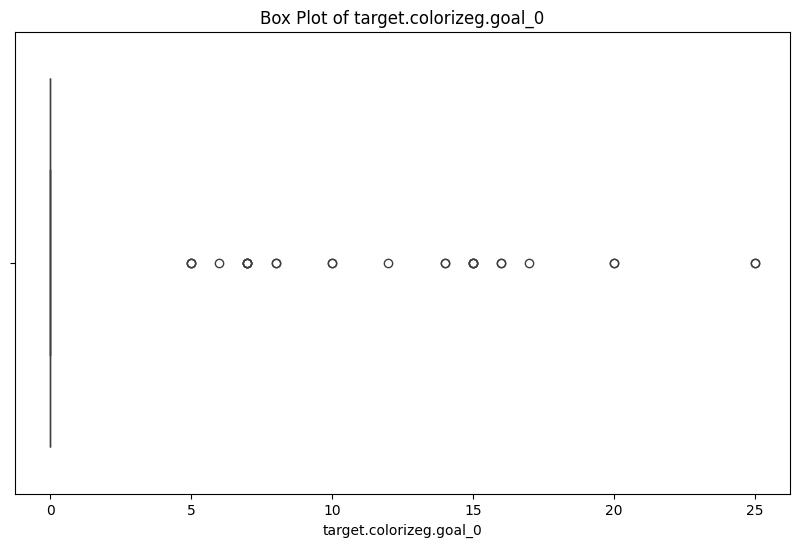

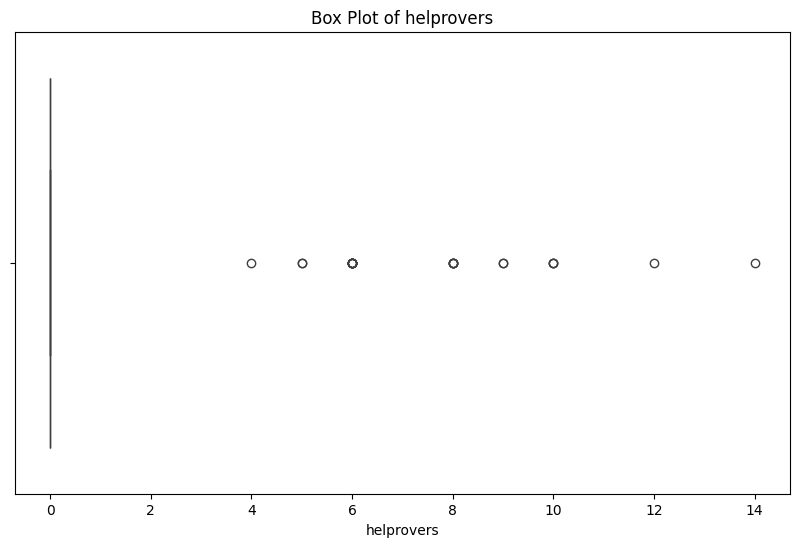

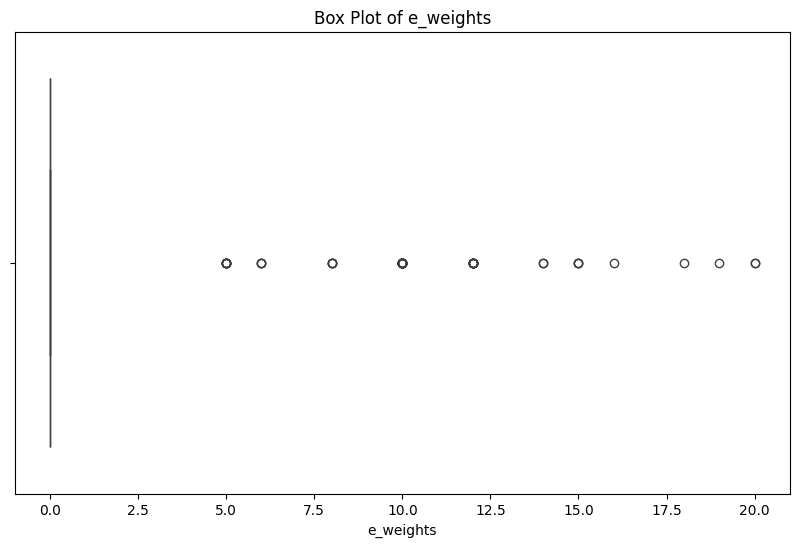

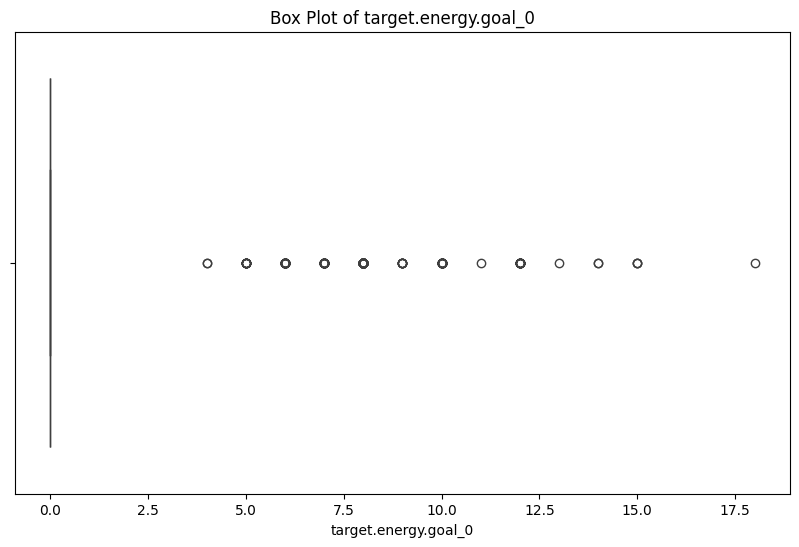

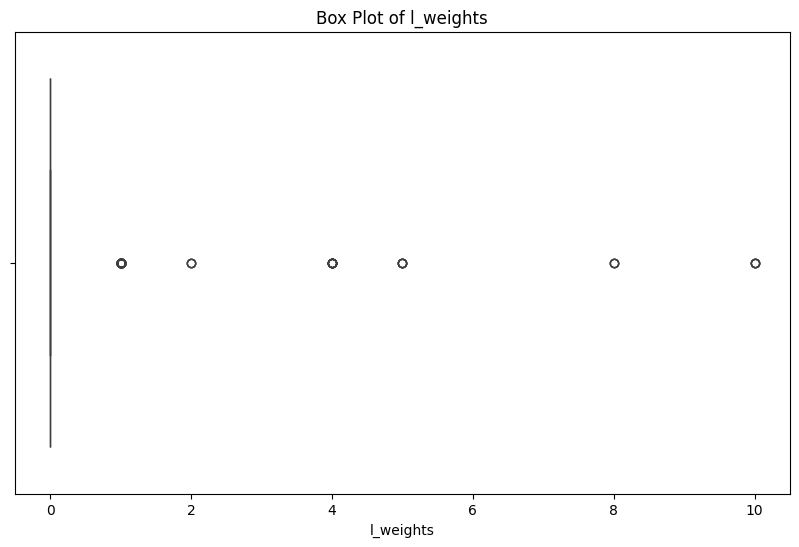

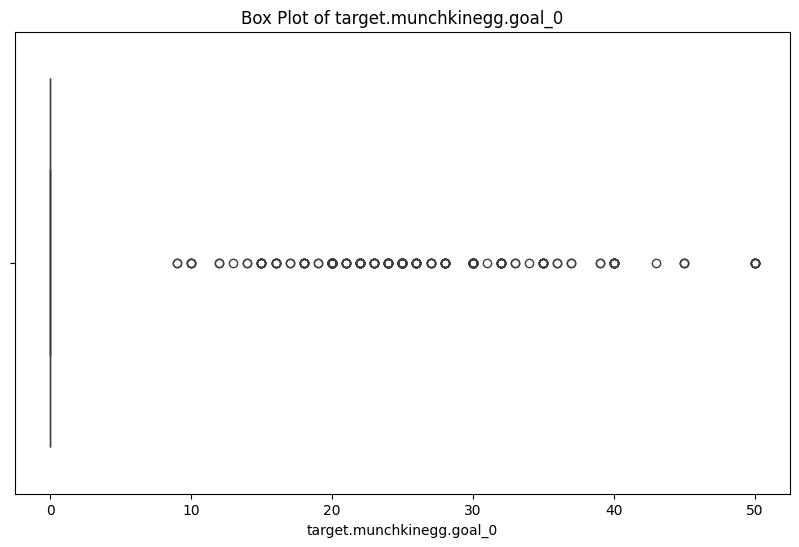

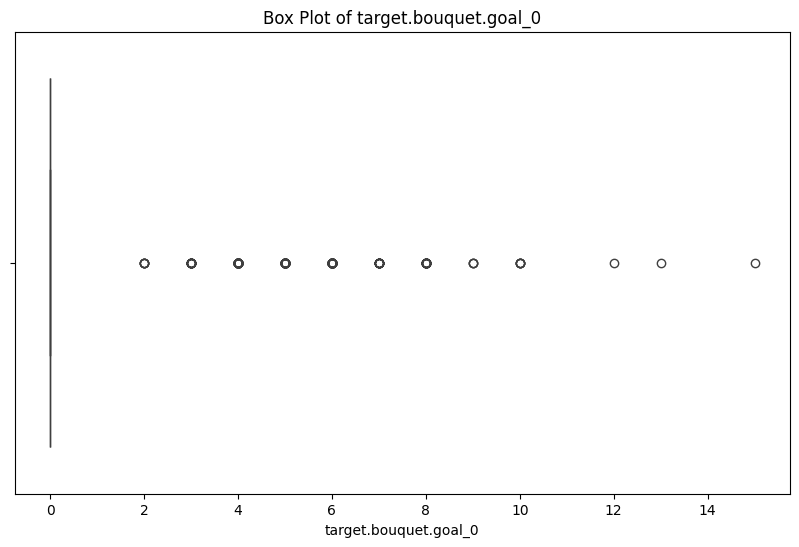

In [201]:
for col in all_lvls_df.columns:
    if col != 'winrate':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=all_lvls_df[col])
        plt.title(f'Box Plot of {col}')


In [202]:
col_min_max_cap_dict = {'r_weights':[ 10,35]
,'b_weights':[ 10,35]
,'g_weights':[ 10,35]
,'y_weights':[ 10,35]
,'v_weights':[ 0,40]
,'o_weights':[ 0, 35]
,'w_weights':[ 0, 35]
,'c_weights':[ 0, 40]
,'h_weights':[ 0, 35]
,'p_weights':[ 0, 20]
,'x_weights':[ 0, 30]
,'target.yellow.goal_0':[ 0,250]
,'target.blue.goal_0':[ 0,250]
,'target.green.goal_0': [0,250]
,'target.red.goal_0': [0,250]
,'target.orange.goal_0': [0,125]
,'target.flower.goal_0': [0,50]
,'target.smoke.goal_0': [0,15]
,'target.tire.goal_0': [0,50]
,'target.colorizer.goal_0' :[0,20]
,'target.colorizeb.goal_0': [0,30]
,'target.colorizev.goal_0': [0,15]
,'target.energy.goal_0': [0,15]
,'target.munchkinegg.goal_0': [0,40]
,'frogs' :[0, 40]
,'bugs' :[0, 30]
,'winkies' :[0, 35]
,'helprovers' :[0,12]}

In [203]:
for col in col_min_max_cap_dict.keys():
  all_lvls_df[col] = all_lvls_df[col].map(lambda x: col_min_max_cap_dict[col][0] if x <= col_min_max_cap_dict[col][0] else x)
  all_lvls_df[col] = all_lvls_df[col].map(lambda x: col_min_max_cap_dict[col][1] if x >= col_min_max_cap_dict[col][1] else x)

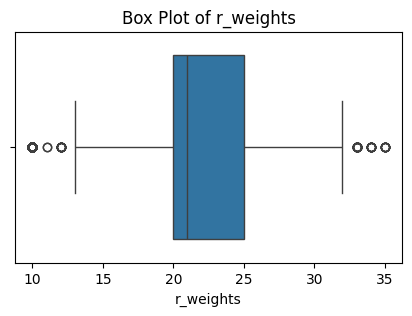

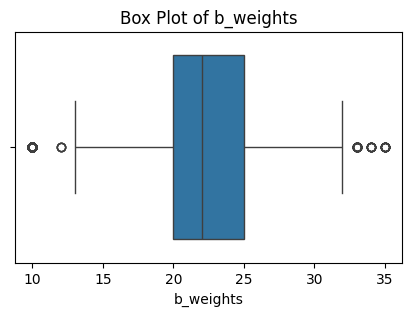

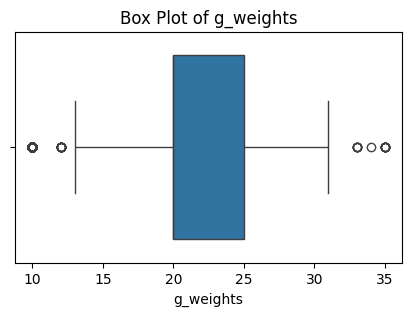

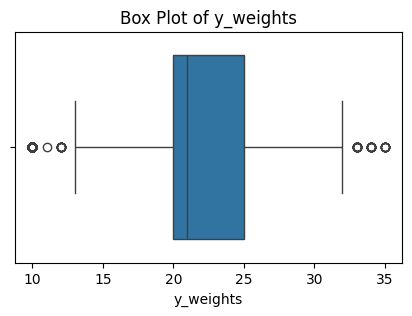

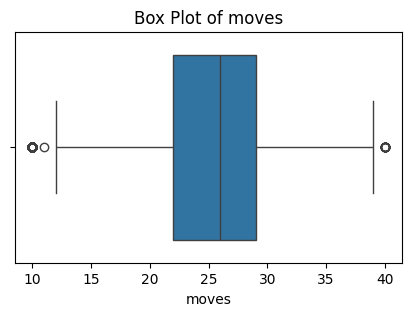

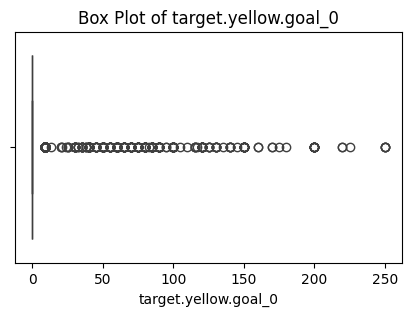

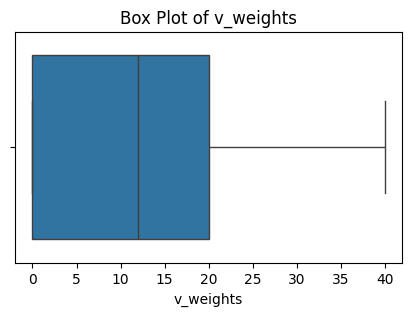

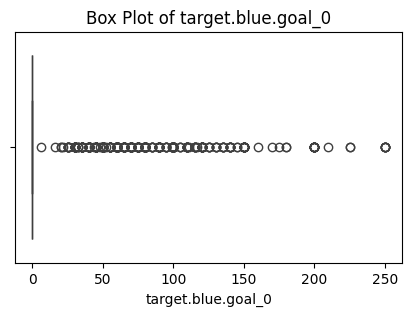

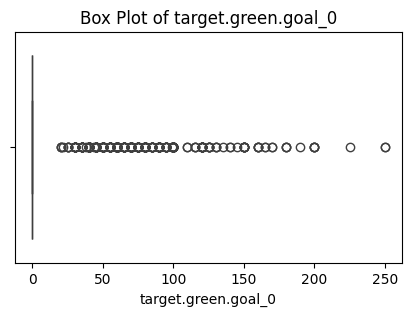

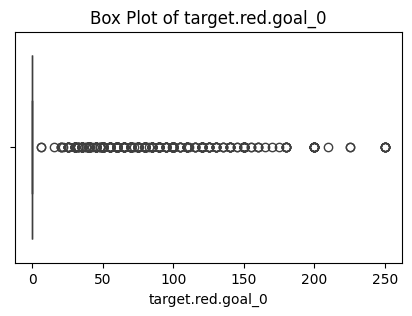

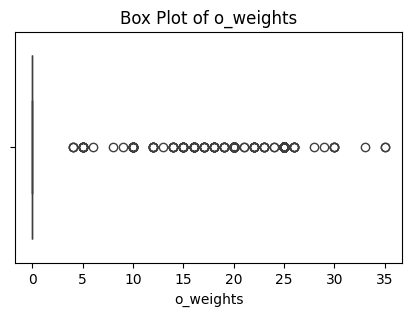

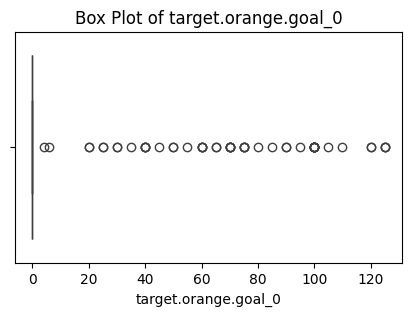

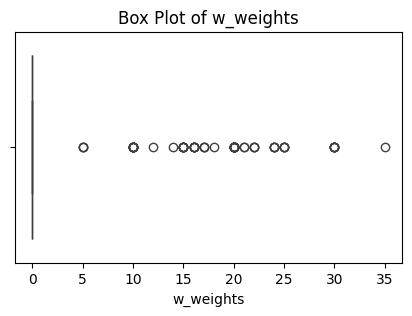

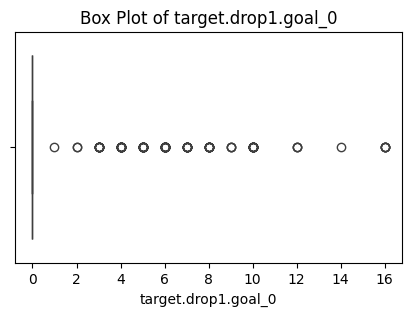

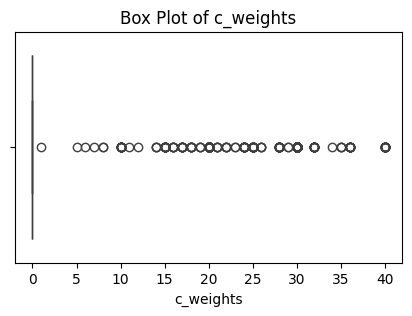

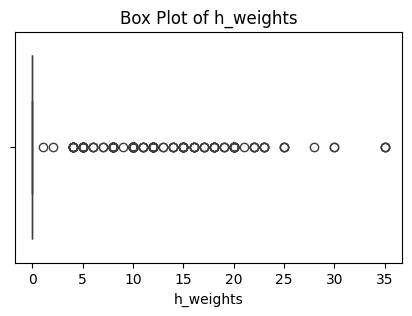

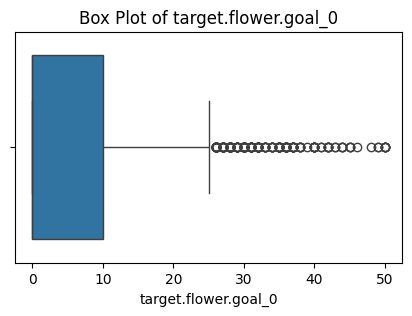

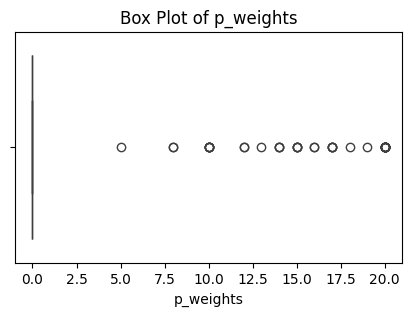

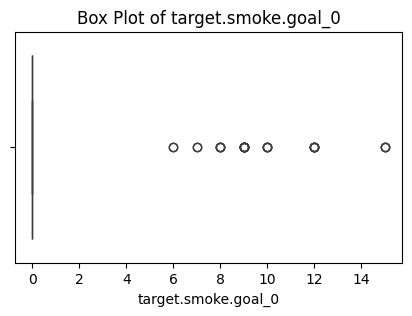

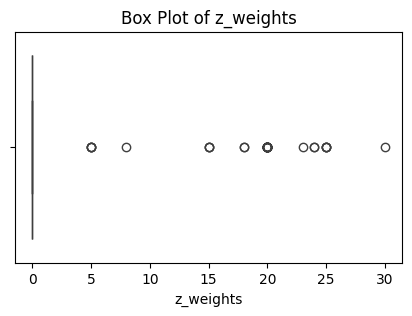

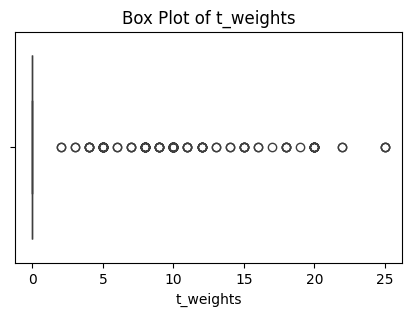

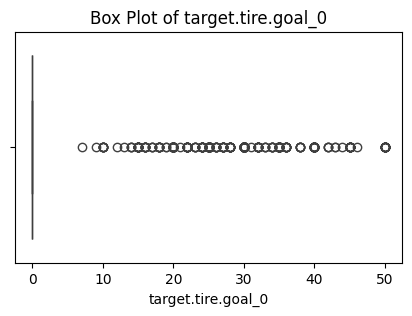

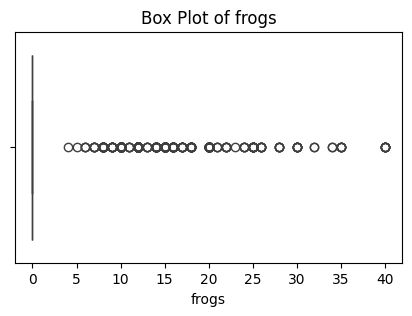

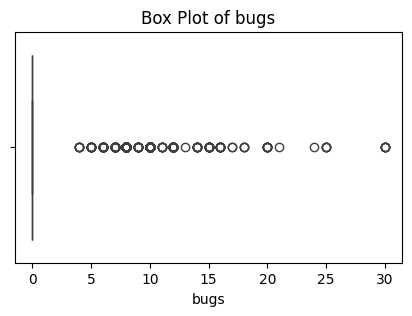

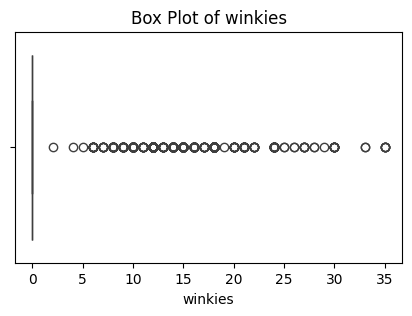

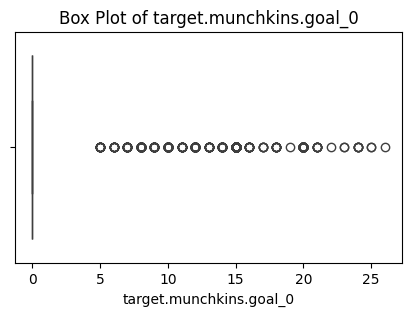

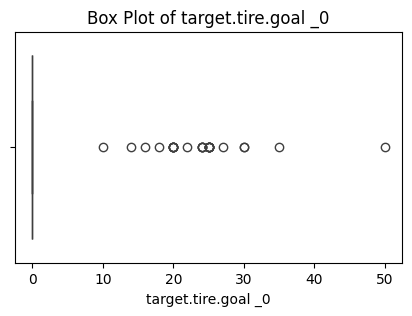

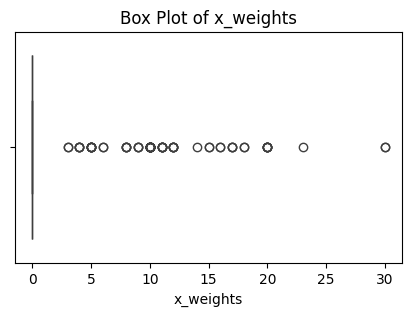

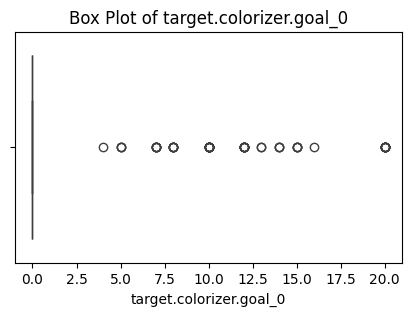

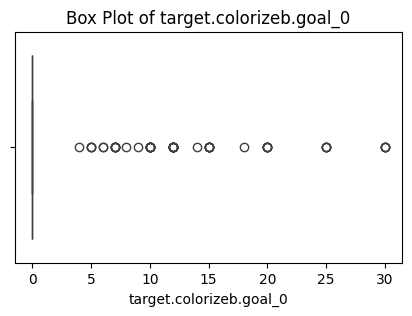

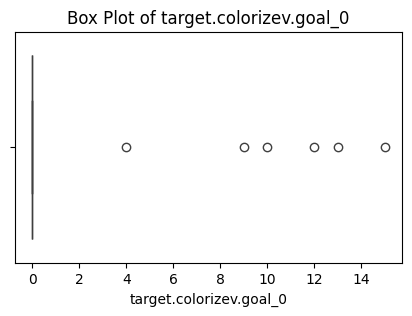

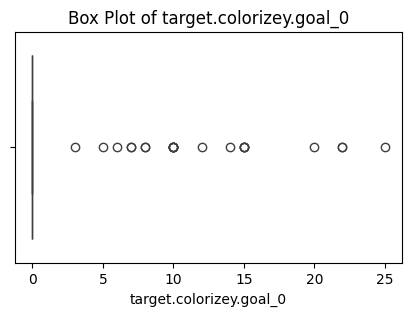

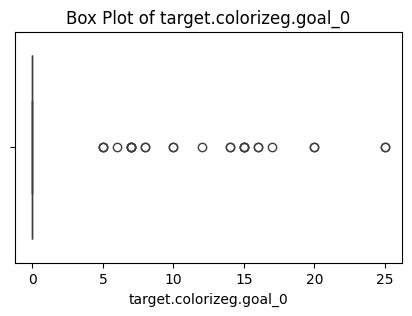

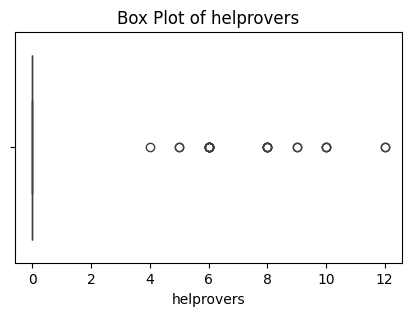

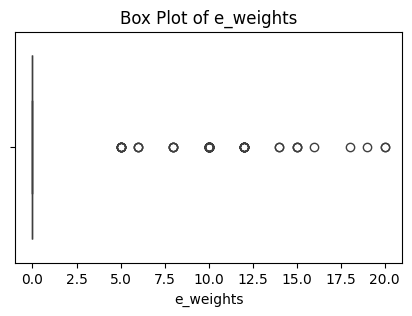

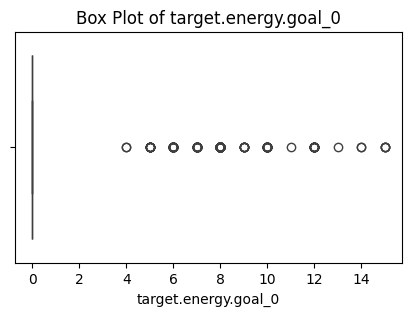

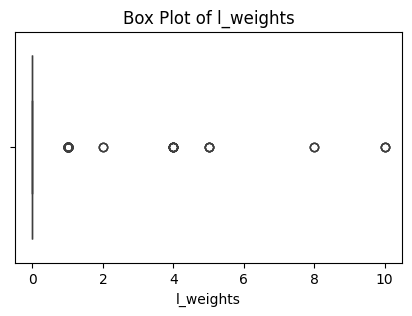

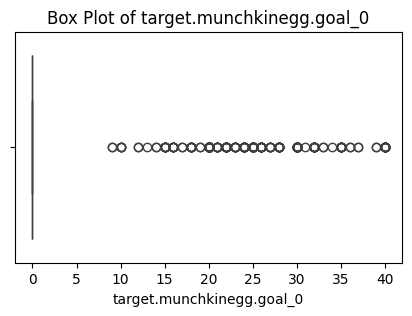

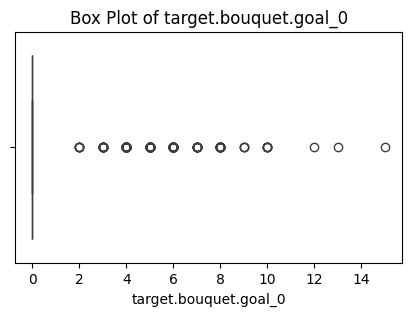

In [204]:
for col in all_lvls_df.columns:
    if col != 'winrate':
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=all_lvls_df[col])
        plt.title(f'Box Plot of {col}')

In [205]:
all_lvls_df['target.tire.goal_0'] = all_lvls_df['target.tire.goal_0']+all_lvls_df['target.tire.goal _0']

In [206]:
all_lvls_df.drop(['target.tire.goal _0'],axis=1, inplace=True)

In [207]:
all_lvls_df.drop(['l_weights'],axis=1, inplace=True)

In [208]:
all_lvls_df.shape

(5854, 38)

In [209]:
all_lvls_df['helprovers'].sample()


,helprovers
level,
1209,0


In [221]:
np.random.randint(all_lvls_df['helprovers'].min(), all_lvls_df['helprovers'].max())

10

In [222]:


d ={}

for col in all_lvls_df.columns:
  d[col] = np.random.randint(all_lvls_df[col].min(), all_lvls_df[col].max())#all_lvls_df[col].sample().iloc[0]

d
# newlevel = pd.DataFrame(d)
# newlevel

{'r_weights': 25,
 'b_weights': 21,
 'g_weights': 25,
 'y_weights': 28,
 'moves': 29,
 'target.yellow.goal_0': 98,
 'v_weights': 16,
 'target.blue.goal_0': 181,
 'target.green.goal_0': 226,
 'target.red.goal_0': 99,
 'o_weights': 25,
 'target.orange.goal_0': 48,
 'w_weights': 6,
 'target.drop1.goal_0': 4,
 'c_weights': 5,
 'h_weights': 14,
 'target.flower.goal_0': 47,
 'p_weights': 0,
 'target.smoke.goal_0': 2,
 'z_weights': 2,
 't_weights': 7,
 'target.tire.goal_0': 29,
 'frogs': 12,
 'bugs': 8,
 'winkies': 4,
 'target.munchkins.goal_0': 2,
 'x_weights': 27,
 'target.colorizer.goal_0': 10,
 'target.colorizeb.goal_0': 28,
 'target.colorizev.goal_0': 4,
 'target.colorizey.goal_0': 5,
 'target.colorizeg.goal_0': 13,
 'helprovers': 0,
 'e_weights': 10,
 'target.energy.goal_0': 1,
 'target.munchkinegg.goal_0': 7,
 'target.bouquet.goal_0': 6,
 'winrate': 93}

In [237]:
# prompt: create data frame from dictionary

newlevel = pd.DataFrame([d])
newlevel

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,z_weights,t_weights,target.tire.goal_0,frogs,bugs,winkies,target.munchkins.goal_0,x_weights,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate
0,25,21,25,28,29,98,16,181,226,99,25,48,6,4,5,14,47,0,2,2,7,29,12,8,4,2,27,10,28,4,5,13,0,10,1,7,6,93


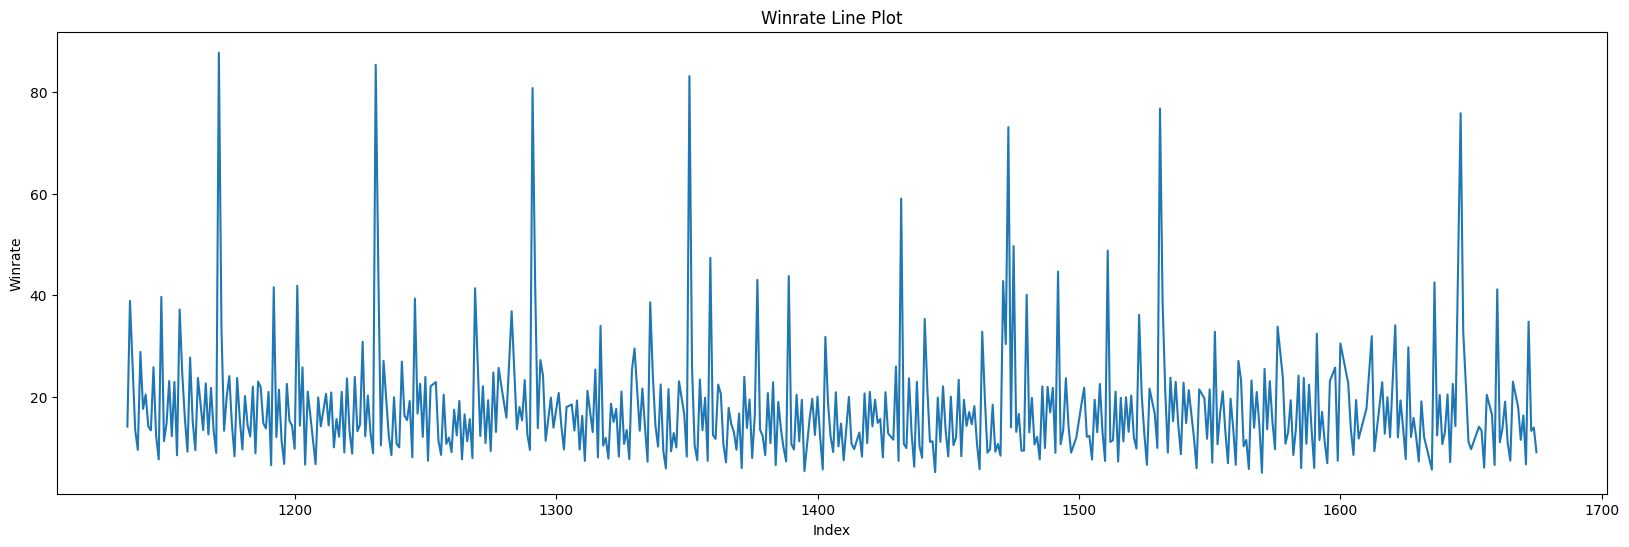

In [183]:
# prompt: line plot all_lvls_df['winrate']

plt.figure(figsize=(20, 6))
plt.plot(all_lvls_df['winrate'].iloc[1000:1500])
plt.title('Winrate Line Plot')
plt.xlabel('Index')
plt.ylabel('Winrate')
plt.show()

In [123]:
|# all_lvls_df.to_csv('/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/all_lvls_4train_cap.csv')

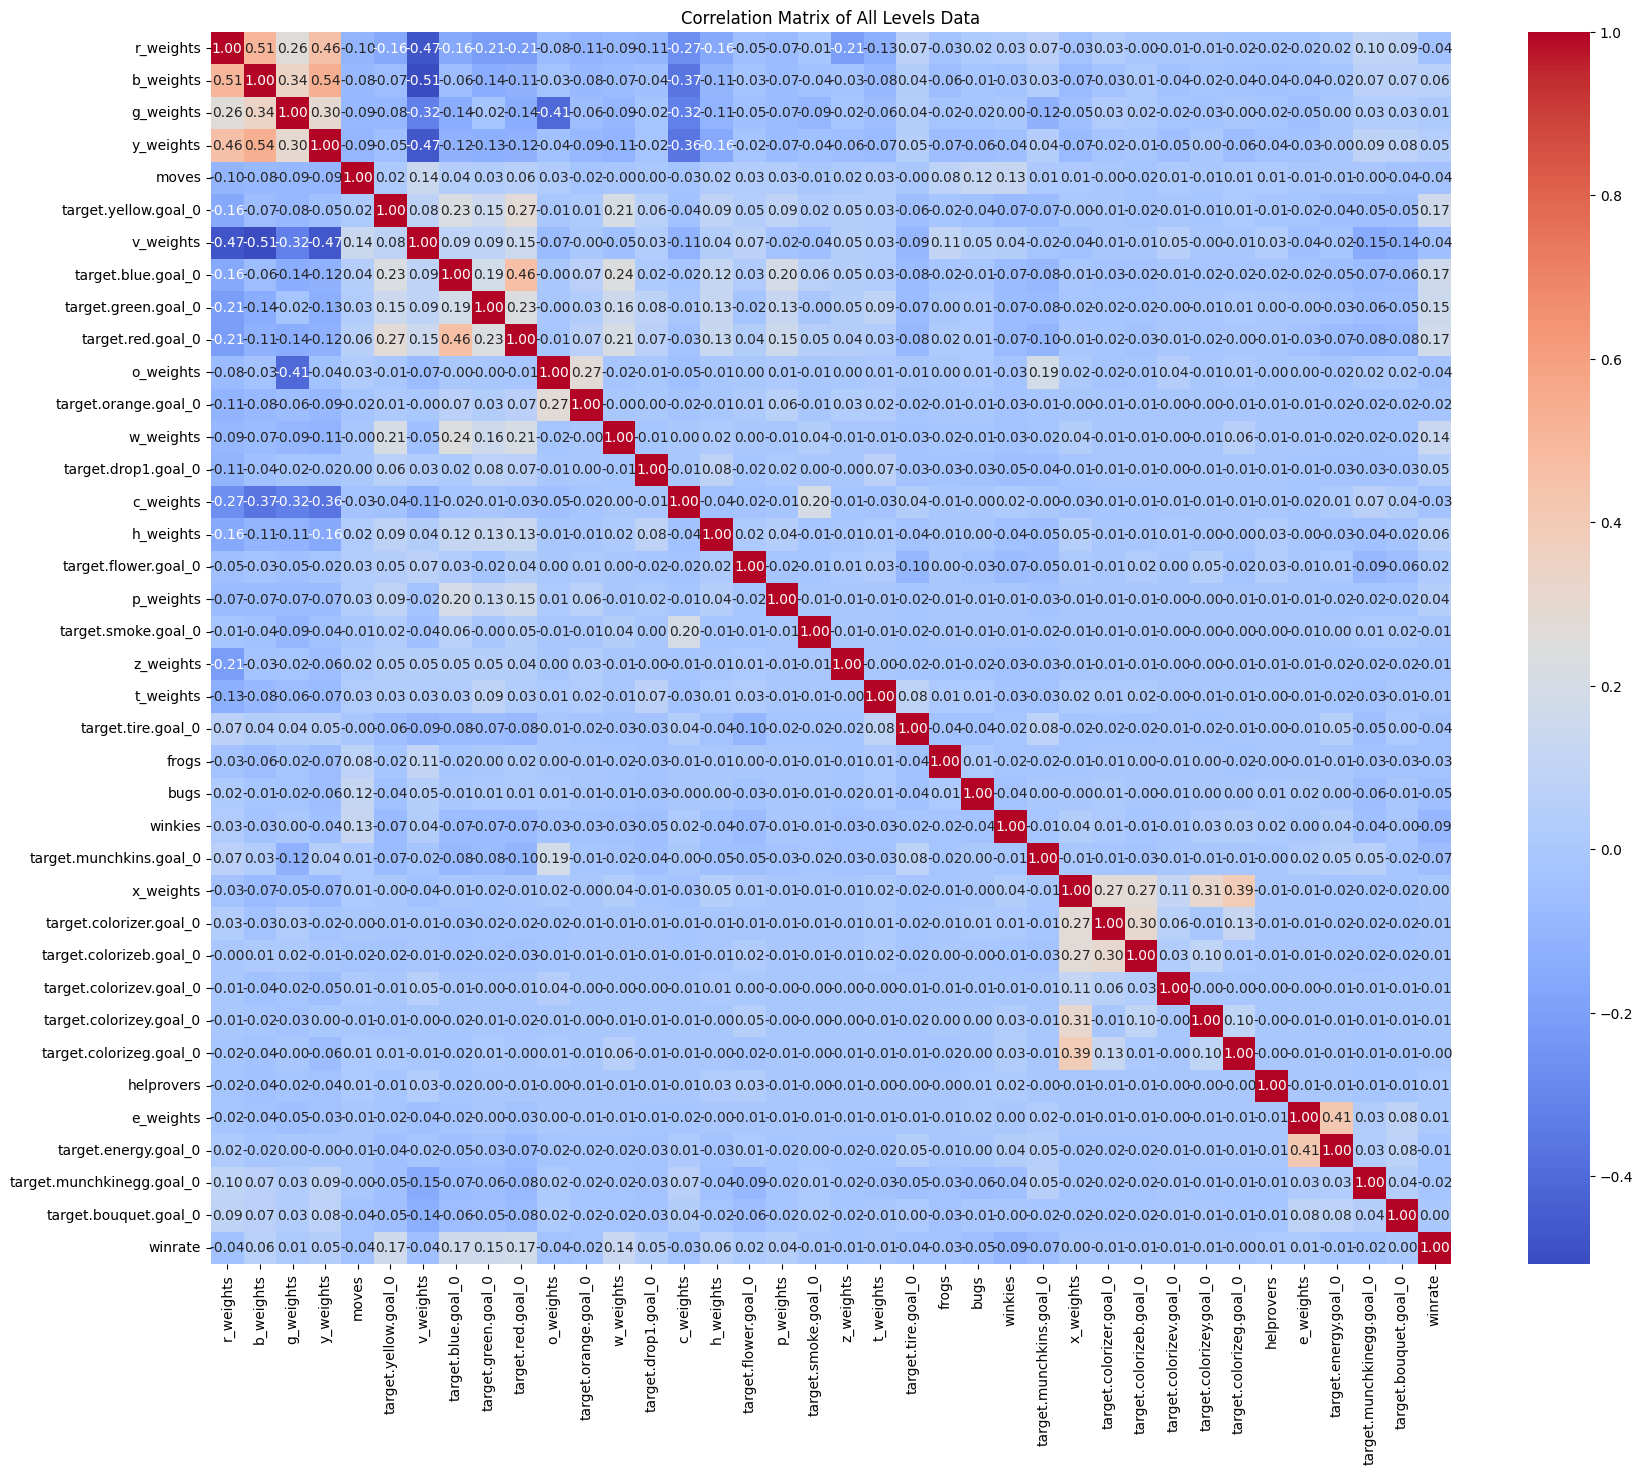

In [124]:
# create correlation metrix for all_lvls_df

correlation_matrix = all_lvls_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Levels Data')
plt.show()

<Axes: >

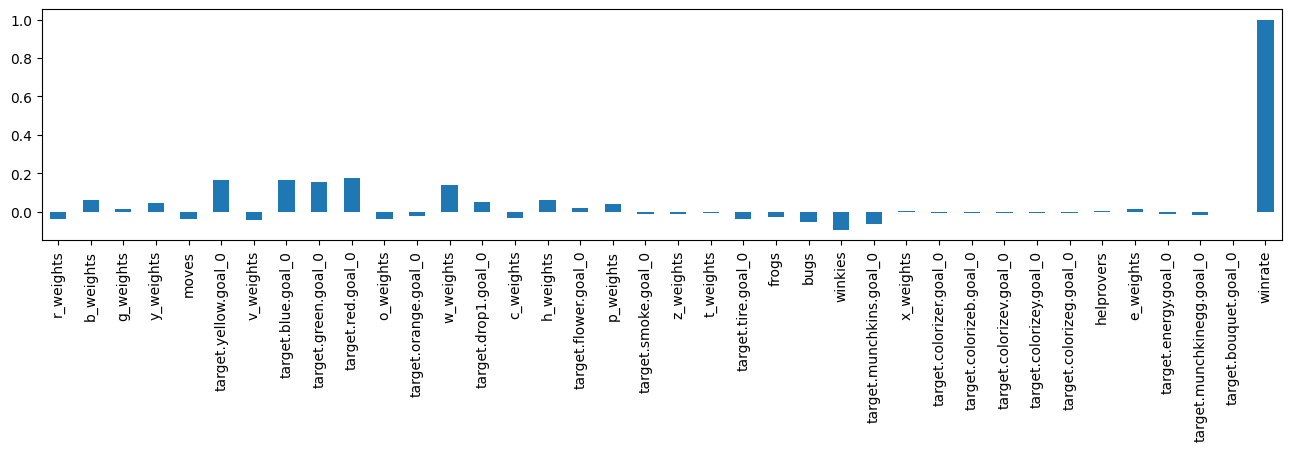

In [131]:
plt.figure(figsize=(16, 3))
correlation_matrix.winrate.plot.bar()

In [139]:
correlation_matrix.winrate.shape

(38,)

In [145]:
filt_corr =correlation_matrix.winrate[(correlation_matrix.winrate < -0.01) | (correlation_matrix.winrate > 0.01)]
filt_corr

,winrate
r_weights,-0.038284
b_weights,0.060046
g_weights,0.014184
y_weights,0.045891
moves,-0.036007
target.yellow.goal_0,0.166688
v_weights,-0.042901
target.blue.goal_0,0.165911
target.green.goal_0,0.153717
target.red.goal_0,0.173114


In [148]:
filt_corr.index[0]

'r_weights'

In [150]:
all_lvls_df =all_lvls_df[filt_corr.index]

In [230]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [231]:

# Define features and target variable
X = all_lvls_df.drop(columns=['winrate'])  # Replace 'winrate' with your target column name
y = all_lvls_df['winrate']

In [232]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# # Define features and target variable
# X = data.drop(columns=['winrate'])  # Replace 'winrate' with your target column name
# y = data['winrate']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:

# Normalize the features (optional for XGBoost, but it can help in some cases)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [234]:

# # Initialize the model
# model = RandomForestRegressor(n_estimators=1000, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# Convert datasets into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',           # Evaluation metric
    'learning_rate': 0.1,
    'max_depth': 8,
    'n_estimators': 100,
    'random_state': 42
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=56)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 145.9150848853114
R^2 Score: 0.08574174484777952


In [235]:
# Make predictions
# y_pred = model.predict(dtest)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")



# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")

# # Predict winrate for new data
# new_data = pd.DataFrame({  # Replace with actual feature values
#     'feature1': [value1],
#     'feature2': [value2],
#     # Add all other features here
# })
# predicted_winrate = model.predict(new_data)
# print(f"Predicted Winrate: {predicted_winrate}")


In [239]:
X1 = newlevel.drop(columns=['winrate'])  # Replace 'winrate' with your target column name
y1 = newlevel['winrate']

In [241]:
X2 = scaler.transform(X1)

In [242]:
X2

array([[ 0.86643615, -0.20921932,  0.9652108 ,  1.71372961,  0.57796226,
         4.11281442,  0.63031258,  6.35281234, 10.11473895,  2.81863532,
         4.32065513,  6.35704605,  2.69188457,  3.73288825,  0.41499676,
         5.06005977,  4.35483935, -0.08530971,  2.5702891 ,  1.04367242,
         3.8821448 ,  3.313677  ,  2.19693389,  2.22901101,  0.36544467,
         0.1331167 , 18.21607192,  7.84382011, 18.5000577 , 10.80190587,
         5.75232518, 13.57317456, -0.06069481,  8.35171688,  0.36819517,
         0.96747903,  4.69207182]])

In [245]:
X1

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,z_weights,t_weights,target.tire.goal_0,frogs,bugs,winkies,target.munchkins.goal_0,x_weights,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,target.munchkinegg.goal_0,target.bouquet.goal_0
0,25,21,25,28,29,98,16,181,226,99,25,48,6,4,5,14,47,0,2,2,7,29,12,8,4,2,27,10,28,4,5,13,0,10,1,7,6


In [246]:
dnew = xgb.DMatrix(X2, label=y1)

In [247]:
# newlevel.drop(['winrate'], axis=1, inplace=True)


predicted_winrate = model.predict(dnew)
print(f"Predicted Winrate: {predicted_winrate}")

Predicted Winrate: [23.756035]


In [ ]:

# Predict winrate for new data
new_data = scaler.transform([[value1, value2, ..., value40]])  # Replace with actual feature values
dnew = xgb.DMatrix(new_data)
predicted_winrate = model.predict(dnew)
print(f"Predicted Winrate: {predicted_winrate}")

In [ ]:
X_test['predicted_winrate'] = y_pred

In [ ]:
pred_df = pd.DataFrame()

pred_df['level'] = X_test.index
pred_df['winrate'] = y_test
pred_df['predicted_winrate'] = y_pred

pred_df.dropna(axis=0, inplace=True)

pred_df.set_index('level', inplace=True)

pred_df =pred_df.sort_values(by='level')

pred_df.head(50)

In [ ]:


plt.figure(figsize=(20, 8))  # Set the figure size to 10x10 inches
plt.plot(pred_df.index, pred_df['winrate'], label='Actual Winrate')
plt.plot(pred_df.index, pred_df['predicted_winrate'], label='Predicted Winrate')
plt.xlabel('Level')
plt.ylabel('Winrate')
plt.title('Actual vs Predicted Winrate')
plt.legend()
plt.show()

In [ ]:
# prompt: plot bar chart:plt.figure(figsize=(20, 8))  # Set the figure size to 10x10 inches
# plt.bar(pred_df.index, pred_df[['winrate','predicted_winrate']], label='Actual Winrate')
# # plt.bar(pred_df.index, pred_df['predicted_winrate'], label='Predicted Winrate')
# plt.xlabel('Level')
# plt.ylabel('Winrate')
# plt.title('Actual vs Predicted Winrate')
# plt.legend()
# plt.show()

plt.figure(figsize=(20, 8))  # Set the figure size to 10x10 inches

# Plot 'winrate' and 'predicted_winrate' as separate bars for each level
plt.bar(pred_df.index, pred_df['winrate'], label='Actual Winrate', width=0.4, align='center')
plt.bar(pred_df.index + 0.4, pred_df['predicted_winrate'], label='Predicted Winrate', width=0.4, align='center')

plt.xlabel('Level')
plt.ylabel('Winrate')
plt.title('Actual vs Predicted Winrate')
plt.legend()
plt.show()